# Data Preprossesing

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
# Read the data to Python environment
data = pd.read_csv('titanic_dataset.csv')

In [3]:
# Displaying five random rows
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C


# 2. Make ‘PassengerId’ as the index column

In [4]:
data.shape

(891, 12)

In [6]:
data['PassengerId'].nunique()

891

In [7]:
# PassengerId column contains 891 unique values which is equal to data set raw size. 
# So, changing the column, PassengerId into index, since it contains only the unique PassengerIds.

In [8]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [9]:
# Getting concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# Displaying the statistical summary of the dataset.
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above table we can find the Total count, Mean, Standard Deviation, Min & Max value and percentile of each column.

In [11]:
# Displaying the statistical summary of the categorical columns in dataset.
data.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


The 'top' is the most common value and 'freq' is the most common value’s frequency.
Data description:

Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
Sibsp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# 4. Fill in all the missing values present in all the columns in the dataset

In [13]:
# Checking for Null values in the data
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

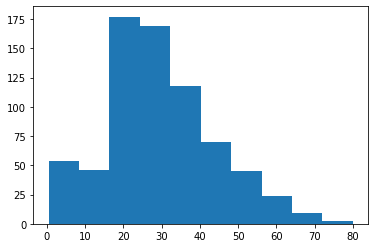

In [14]:
# Handling the missing values in Age column
plt.hist('Age',data = data)
plt.show()

In [15]:
# We see that the data is not normally distributed, it skewed to right.
# So, we fill the missing values with median using fillna() method
data['Age'] = data['Age'].fillna(data['Age'].median())

In [16]:
# Handling the missing values in Cabin column

The 'Cabin' column has got 687 missing values and the total count of raw is 891. Hence, we can see 'Cabin' column got around 77% missing value.
Since, Cabin column is having a high no.of missing values. It's better not to consider it for further calculations

In [18]:
# Removing the Cabin column from the data set.
data = data.drop('Cabin',axis = 1)

In [19]:
# Handling the missing values in Embarked column
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
# Finding the mode of Cabin column
data['Embarked'].mode()

0    S
dtype: object

In [21]:
# Only one mode for the Embarked column, so we replace the missing values with this mode.
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [22]:
# Re- Checking for Null values in the data
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

We successfully handled all the missing values present in the data set. No null values present in the data set.

# 5. Check and handle outliers in at least 3 columns in the dataset

In [24]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [25]:
# We now plot box plots for all the numerical columns to find outliers, if any.

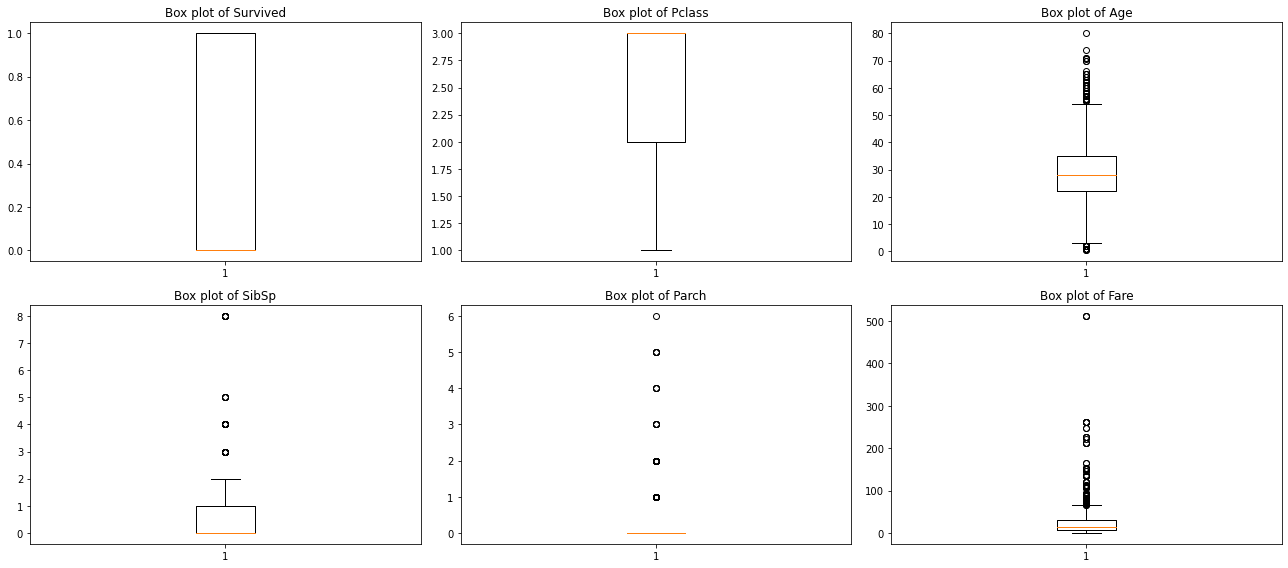

In [26]:
plt.figure(figsize = (18,8))

plt.subplot(2,3,1)
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')


plt.subplot(2,3,2)
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

plt.subplot(2,3,3)
plt.boxplot(data['Age'])
plt.title('Box plot of Age')


plt.subplot(2,3,4)
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

plt.subplot(2,3,5)
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

plt.subplot(2,3,6)
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

plt.tight_layout()
plt.show()

We can see that there are some outliers in Age, SibSp, Parch and Fare columns.
There are different ways to handle the outlier:

We may delete outlier values if it is due to data entry error.
We may impute outlier using mean, median, or zero and thus there is no loss of data.
Quantile based flooring and capping.
Another option is treating the outlier separately in the statistical model. So, we treat them in separate groups (with outlier, deleting outlier, impute outlier) and build individual model for each group and then check the output and find out what is the best way to handle the outlier.

In [27]:
# 1. Checking the outliers in Age column

In [28]:
# Checking the statistical summary of the Age column
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

We can conclude that there is no data entry error, because the Age minimum and maximum range between 0 to 80. So, we don't need to delete any outlier value.
However, in order to reduce the spread of data, we may impute the outliers with the help of Inter Quartile Range (IQR).

In [30]:
# Handling the outlier with the help of Inter Quartile Range(IQR)

In [31]:
# Finding the respective value for the percentiles at 25, 50 and 75.
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

In [32]:
# Calculating the IQR
IQR = Q3 - Q1

In [33]:
# Finding the lower and upper limit
low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

In [34]:
# Now we will find out the outliers by considering that all values below lower and all values above upper limit as outliers.

outlier = []
for i in data['Age']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no.of outliers present in the Age column:',len(outlier))

The no.of outliers present in the Age column: 66


In [36]:
# Since we don't consider it as data entry errors, we will not delete these outliers. 
# We will impute the outliers with median value of Age column because median is not affected by the outliers.

In [37]:
age_median = data['Age'].median() 
data['Age'] = np.where(data['Age'] > upp_limit , age_median , np.where(data['Age'] < low_limit, age_median, data['Age']))

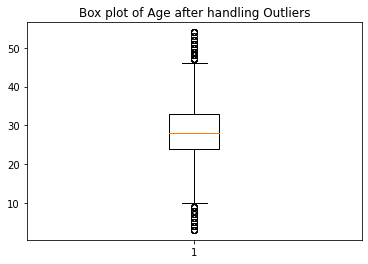

In [38]:
# Re-Checking the Age column after handling the outliers
plt.boxplot(data['Age'])
plt.title('Box plot of Age after handling Outliers')
plt.show()

In [39]:
data['Age'].describe()

count    891.000000
mean      28.476992
std        9.793559
min        3.000000
25%       23.750000
50%       28.000000
75%       33.000000
max       54.000000
Name: Age, dtype: float64

We see there is a significant drop in the outliers, because the mean and median are now really close and the standard deviation reduced.

In [41]:
# 2. Checking the outliers in Fare column

In [42]:
# Checking the statistical summary of the Fare column
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
# Handling the outlier with the help of Inter Quartile Range (IQR)

# Finding the respective value for the percentiles at 25, 50 and 75.
Q1 = np.percentile(data['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation = 'midpoint')

# Calculte the IQR
IQR = Q3 - Q1

# Finding the lower and upper limit
low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

# Finding the outliers by considering that all values below lower and all values above upper limit as outliers.
outlier = []

for i in data['Fare']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no.of outliers present in the Fare column:',len(outlier))

The no.of outliers present in the Fare column: 116


We see that there are 116 outliers. Hence deleting this huge number of values will affect the data set.

We also don't know by 'Fare' it means price of single ticket for one individual or it also contain total fare paid by one family or group.

Hence, we can't say it as an incorrect entry, so imputation is the best way to handle the outliers here because we don’t lose any data.

We see that, the mean is much higher than median and standard deviation is also too high.

Most of the 'Fare' column value lies above the 75th percentile. That means higher Fare values.

So, we will impute all the values above upp_limit using capping and set the cap to upp_limit.


In [45]:
# Re-placing all the values above the upp_limit with the upp_limit value. 
data["Fare"] = np.where(data["Fare"] > upp_limit, upp_limit, data['Fare'])

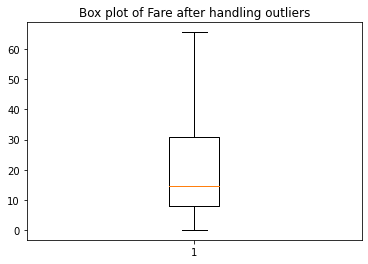

In [46]:
# Re-Checking the Age column after removing the outliers
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare after handling outliers')
plt.show()

In [47]:
data['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

We see there is no outliers and the standard deviation is reduced

In [49]:
# 3. Checking the outliers in SibSp column

In [50]:
print(data['SibSp'].unique())

[1 0 3 4 2 5 8]


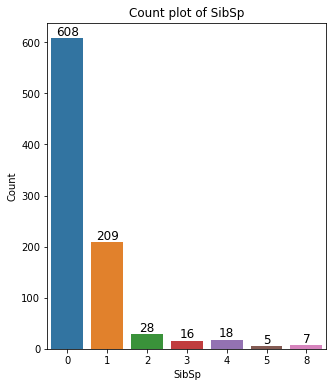

In [51]:
plt.figure(figsize = (5,6))
sibSp_count = sns.countplot(x='SibSp',data=data)
plt.title('Count plot of SibSp')
plt.ylabel('Count')
plt.bar_label(sibSp_count.containers[0],fontsize=12)
plt.show()

In [52]:
data['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [53]:
# We understand that SibSp column represent the no.of Siblings/Spouses abroad in the ship.
# Since they are unique by its own, we don't have to consider them as outliers and keep the SibSp column as same.

In [54]:
# 4. Checking the outliers in Parch column
print(data['Parch'].unique())

[0 1 2 5 3 4 6]


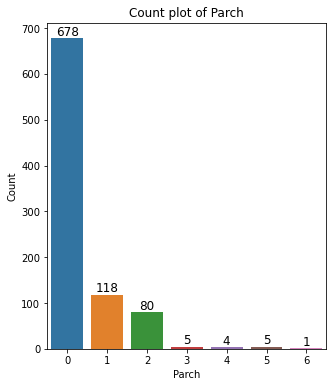

In [55]:
plt.figure(figsize = (5,6))
parch_count = sns.countplot(x='Parch', data = data)
plt.title('Count plot of Parch')
plt.ylabel('Count')
plt.bar_label(parch_count.containers[0],fontsize=12)
plt.show()

In [56]:
data['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [57]:
# Same like SibSp column, the Parch column represent the no.of Parents/Children abroad in the ship.
# Hence, they are unique by its own, and thus we don't have to consider them as outliers and keep the Parch column as same.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

Feature scaling is the process of normalising the range of features in a dataset.

Datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.
The most common techniques of feature scaling are Normalization and Standardization.

MinMaxScaler is the Scikit-learn function for normalisation.
MinMaxScaler transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.

We will compute Linear regression, a model that assumes a linear relationship between the input features (X) and the target feature (y).

In [59]:
# We first calculate it from the normal data(without scaling) and then perform a MinMax scaling to check whether it helping to make better model.

In [60]:
# Creating a new data set which contains only numerical features
sub_data = data.select_dtypes(exclude= 'object')

In [61]:
# Making 'Survived' as target and rest into input
X = sub_data.drop('Survived',axis = 1)
y = sub_data['Survived']

In [62]:
# Checking the statistical summary of the X dataset(input/independent features)
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,28.476992,0.523008,0.381594,24.046813
std,0.836071,9.793559,1.102743,0.806057,20.481625
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.750000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,33.000000,1.000000,0.000000,31.000000
max,3.000000,54.000000,8.000000,6.000000,65.634400


In [63]:
# Now we will make train and test data and then create Linear Regression model and finally make prediction about target.
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .20)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [64]:
# We will find the Mean Squared Error(MSE) and R-Square to evaluate the model
# Importing necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE value is: ', mean_squared_error(y_test, predictions))

print('R squared value is: ', r2_score(y_test, predictions))

MSE value is:  0.19581214722484636
R squared value is:  0.1925332034451348


In [66]:
# Now we will perform MinMax scaling on the feature set 
# Importing necessary libraries
from sklearn import preprocessing

# Create MinMaxScaler with scaling each feature to a range 0 to 1
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

# Fitting into data, and then transforming it.
X = min_max.fit_transform(X)

# Convert the scaled and trasformed data back into a Dataframe
X = pd.DataFrame(X)

# Checking the statistical summary of the scaled and trasformed X dataset
X.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.499549,0.065376,0.063599,0.366375
std,0.418036,0.192031,0.137843,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.406863,0.000000,0.000000,0.120522
50%,1.000000,0.490196,0.000000,0.000000,0.220223
75%,1.000000,0.588235,0.125000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


We successfully scaled and transformed the data using MinMaxScaler setting Min to 0 and Max to 1

In [68]:
# Now we will again create a regression model and check whether MinMaxScaler helped improving the model 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .20)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [69]:
print('MSE value is: ', mean_squared_error(y_test, predictions))

print('R squared value is: ', r2_score(y_test, predictions))

MSE value is:  0.19581214722484636
R squared value is:  0.1925332034451348


We see there is no significant diffrence in the MSE and R squared value. Only a slight diffrence, MSE reducing and R-Squared incrasing.

So we can not say MinMax scalling significantly helped, but it made some minute changes to make it better. Because we know, we need to make MSE closer to zero and R squared to one.